In [12]:
import pandas as pd

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("Students.csv")

In [16]:
df.head()

,Student_Name,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
0,Aarav,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Uttar pradesh,Mobile,Poor
1,Vivaan,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Chhattisgarh,Laptop,Poor
2,Aditya,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Uttarakhand,Tablet,Poor
3,Vihaan,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Delhi ncr,Laptop,High
4,Arjun,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Uttarakhand,Laptop,Medium


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_Name               3614 non-null   object 
 1   College_Name               3614 non-null   object 
 2   Stream                     3614 non-null   object 
 3   Year_of_Study              3614 non-null   int64  
 4   AI_Tools_Used              3614 non-null   object 
 5   Daily_Usage_Hours          3614 non-null   float64
 6   Use_Cases                  3614 non-null   object 
 7   Trust_in_AI_Tools          3614 non-null   int64  
 8   Impact_on_Grades           3614 non-null   int64  
 9   Do_Professors_Allow_Use    3614 non-null   object 
 10  Preferred_AI_Tool          3614 non-null   object 
 11  Awareness_Level            3614 non-null   int64  
 12  Willing_to_Pay_for_Access  3614 non-null   object 
 13  State                      2000 non-null   objec

In [18]:
df.shape

(3614, 16)

In [19]:
df.isnull().sum()

Student_Name                    0
College_Name                    0
Stream                          0
Year_of_Study                   0
AI_Tools_Used                   0
Daily_Usage_Hours               0
Use_Cases                       0
Trust_in_AI_Tools               0
Impact_on_Grades                0
Do_Professors_Allow_Use         0
Preferred_AI_Tool               0
Awareness_Level                 0
Willing_to_Pay_for_Access       0
State                        1614
Device_Used                     0
Internet_Access                 0
dtype: int64

In [20]:
## Dropping State because of huge number of Null vales

In [21]:
df=df.drop(["State"],axis=1)

In [22]:
#Name,college name columns doesnt have a role to play in eda and hence remove them too for analysis

In [23]:
df=df.iloc[:,2:]


In [24]:
df.shape

(3614, 13)

## EDA 

## AI TOOL USED VS AI TOOL PREFERRED

The followup plots be it bar pie or ven digrams look into ai tools used by students and what they prefered with special analysis
on top 3 models Chatgpt,Gemini,Copilot.I used value_count method to great extent for finding the number of users .

<Axes: xlabel='AI_Tools_Used'>

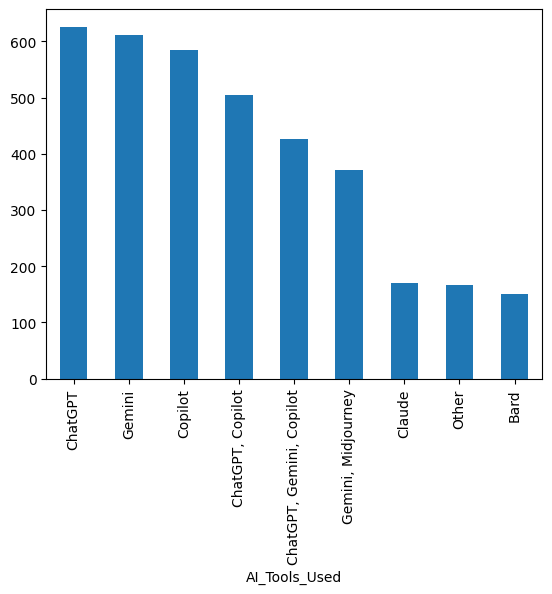

In [13]:
df["AI_Tools_Used"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

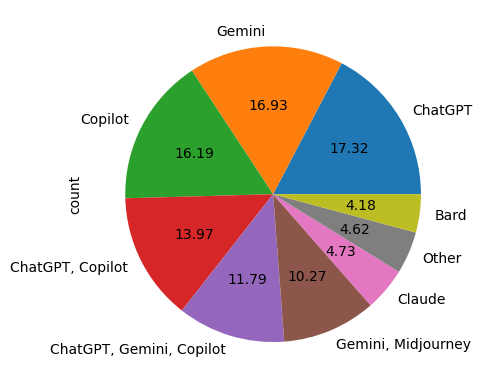

In [14]:
df["AI_Tools_Used"].value_counts().plot(kind="pie",autopct="%.2f")

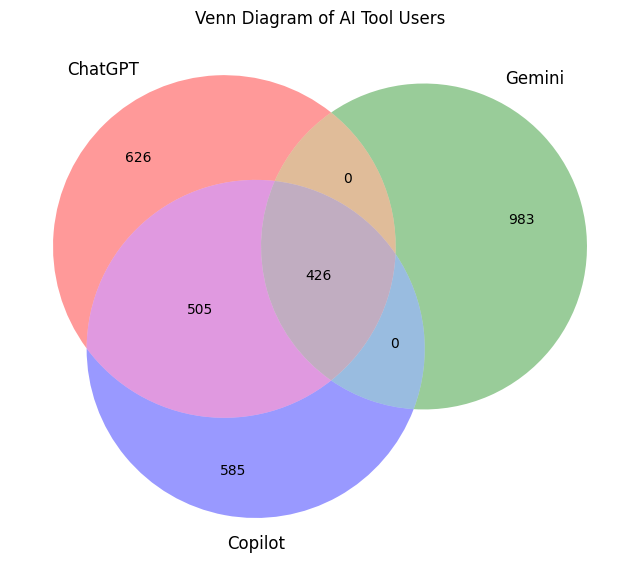

In [15]:
from matplotlib_venn import venn3

chatgpt_users = set(df[df["AI_Tools_Used"].str.contains("ChatGPT")].index)
gemini_users = set(df[df["AI_Tools_Used"].str.contains("Gemini")].index)
copilot_users = set(df[df["AI_Tools_Used"].str.contains("Copilot")].index)


plt.figure(figsize=(8,8))
venn3([chatgpt_users, gemini_users, copilot_users], 
      set_labels=('ChatGPT', 'Gemini', 'Copilot'))
plt.title("Venn Diagram of AI Tool Users")
plt.show()


<Axes: xlabel='Preferred_AI_Tool'>

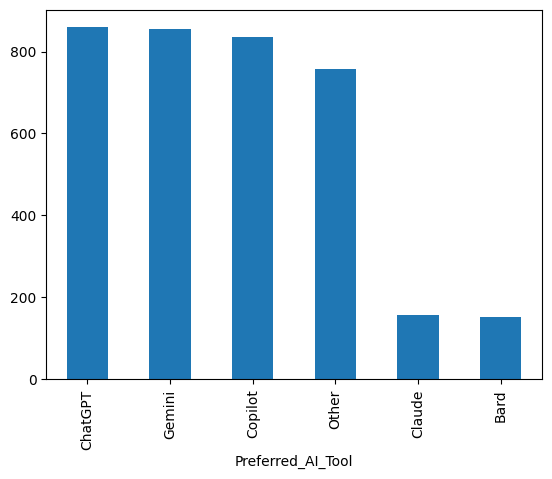

In [42]:
(df["Preferred_AI_Tool"].value_counts().plot(kind="bar"))

In [17]:
df[df["AI_Tools_Used"]=="ChatGPT"]["Preferred_AI_Tool"].value_counts()

Preferred_AI_Tool
Copilot    183
Other      139
ChatGPT    136
Gemini     115
Claude      27
Bard        26
Name: count, dtype: int64

In [18]:
df[df["AI_Tools_Used"] == "ChatGPT, Copilot"]["Preferred_AI_Tool"].value_counts()

Preferred_AI_Tool
ChatGPT    151
Gemini     131
Other      116
Copilot    107
Name: count, dtype: int64

In [19]:
df[df["AI_Tools_Used"] == "ChatGPT, Gemini, Copilot"]["Preferred_AI_Tool"].value_counts().reset_index()


,Preferred_AI_Tool,count
0,Gemini,126
1,Other,105
2,ChatGPT,98
3,Copilot,97


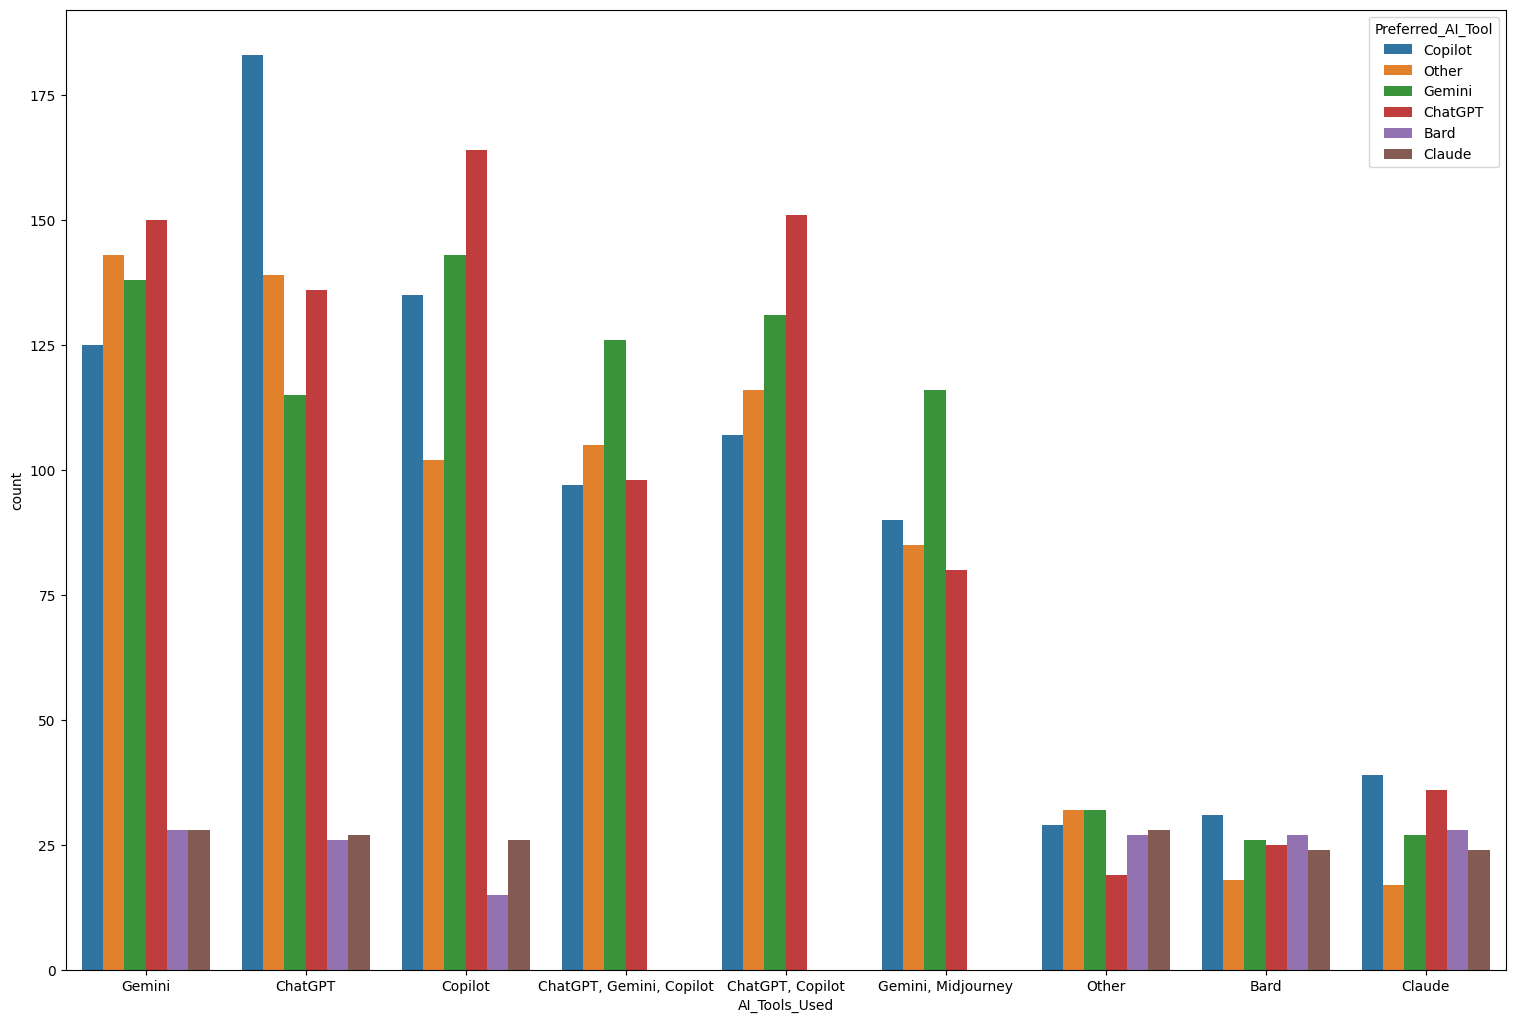

In [20]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
sns.countplot(x=df["AI_Tools_Used"],hue=df["Preferred_AI_Tool"],ax=ax)

plt.savefig("preferred_toolvsAI_tool_used.png", dpi=100, bbox_inches='tight')

INTERESTING:
1) among student that uses all three gpt,gemini and copilot : Gemini is clearly preferred 
2) student that uses gemini prefer gpt or others as prefered ai_tool
3) suprisingly copilot is preferred by those who tends to use Chatgpt but those says they use both prefer chatgpt aswell as by copilot user.
4) copilot dominates the category in claude and bard users 



THE BOXPLOT BELOW DISCUSS YET ANOTHER KEY ASPECT : TRUST IN AI TOOL

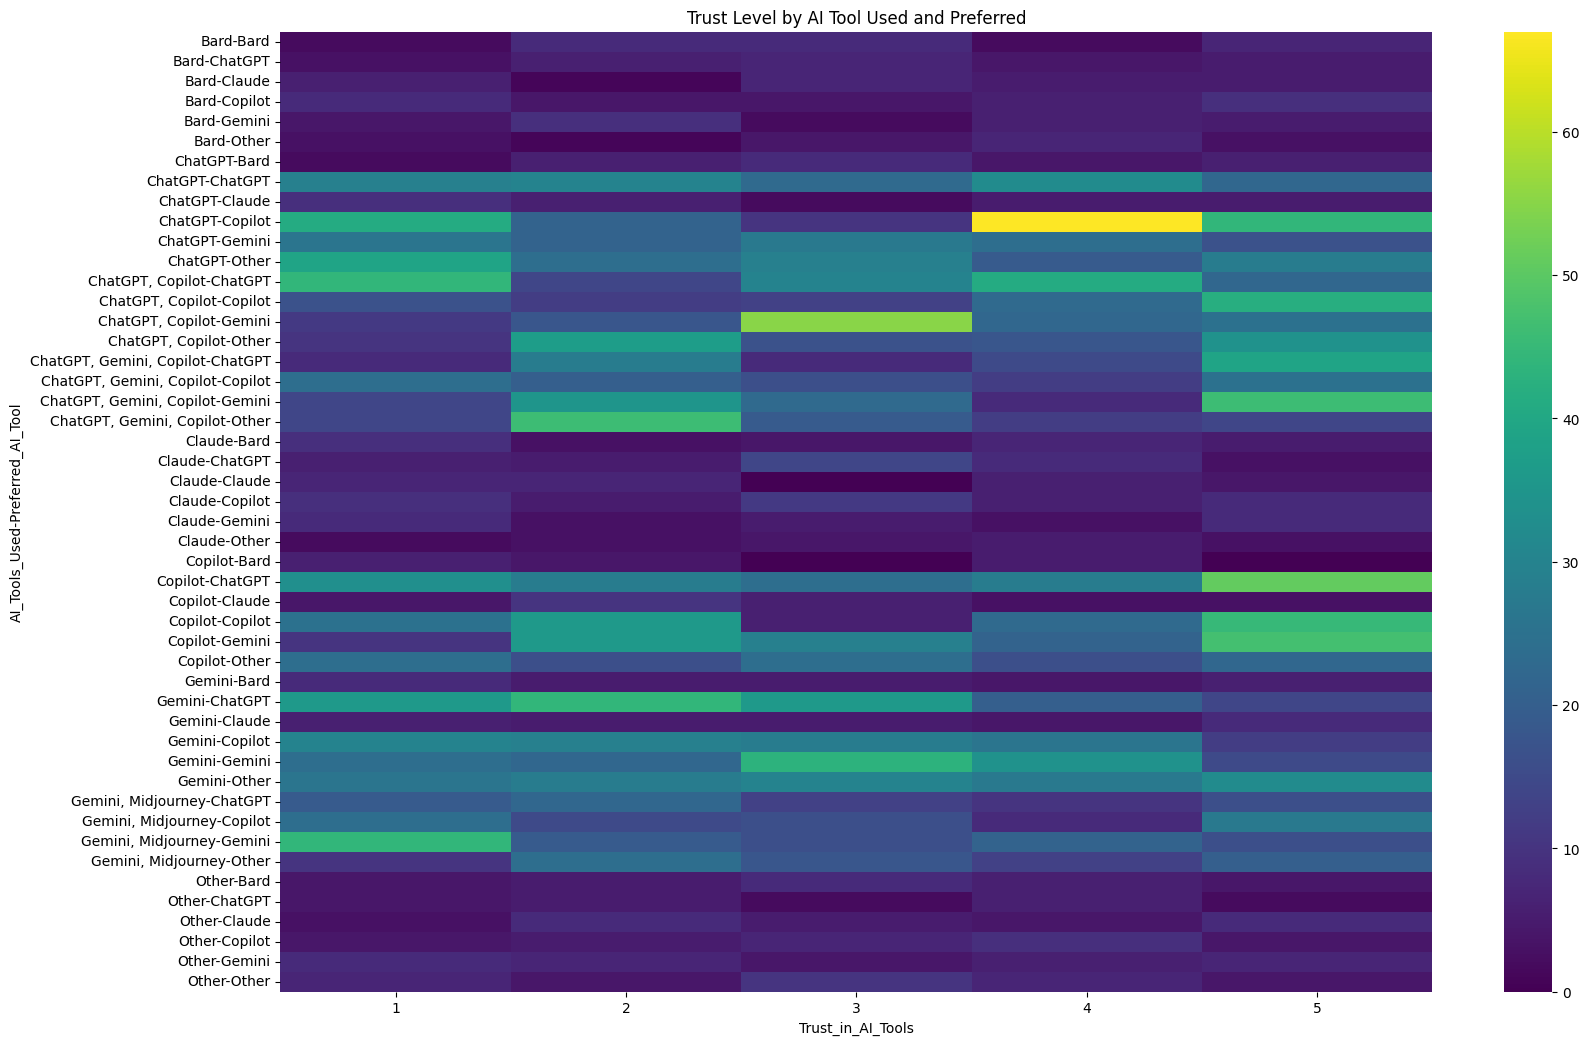

In [38]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
trust_crosstab = pd.crosstab(
    index=[df["AI_Tools_Used"], df["Preferred_AI_Tool"]],
    columns=df["Trust_in_AI_Tools"])
sns.heatmap(trust_crosstab, fmt='d', cmap='viridis',ax=ax)
plt.title('Trust Level by AI Tool Used and Preferred')
plt.savefig("AI_TOOL_USED VS AI PREFERRED TRUST LEVEL")




Even though its messier but most clear observation:
The chatgpt users at trust level 4 are preferring copilot
 

## STREAM AND YEAR OF STUDY 

NOW MY EDA DWELL UPON AI PREFERENCE BY DIFFERENT STREAM STUDENT AND YEAR OF STUDY

<Axes: xlabel='Stream'>

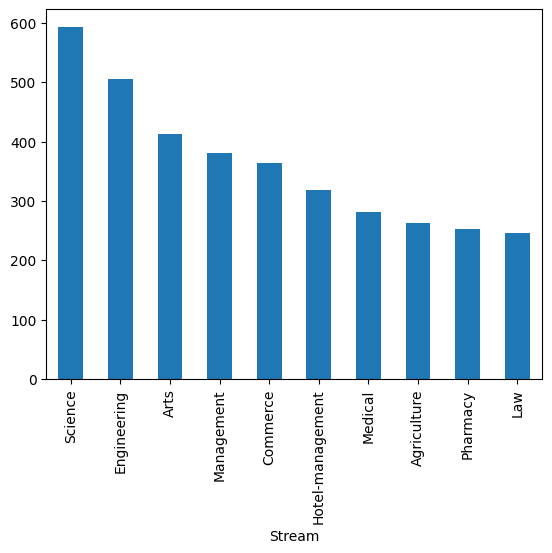

In [47]:
df["Stream"].value_counts().plot(kind="bar")

<Axes: xlabel='Stream', ylabel='count'>

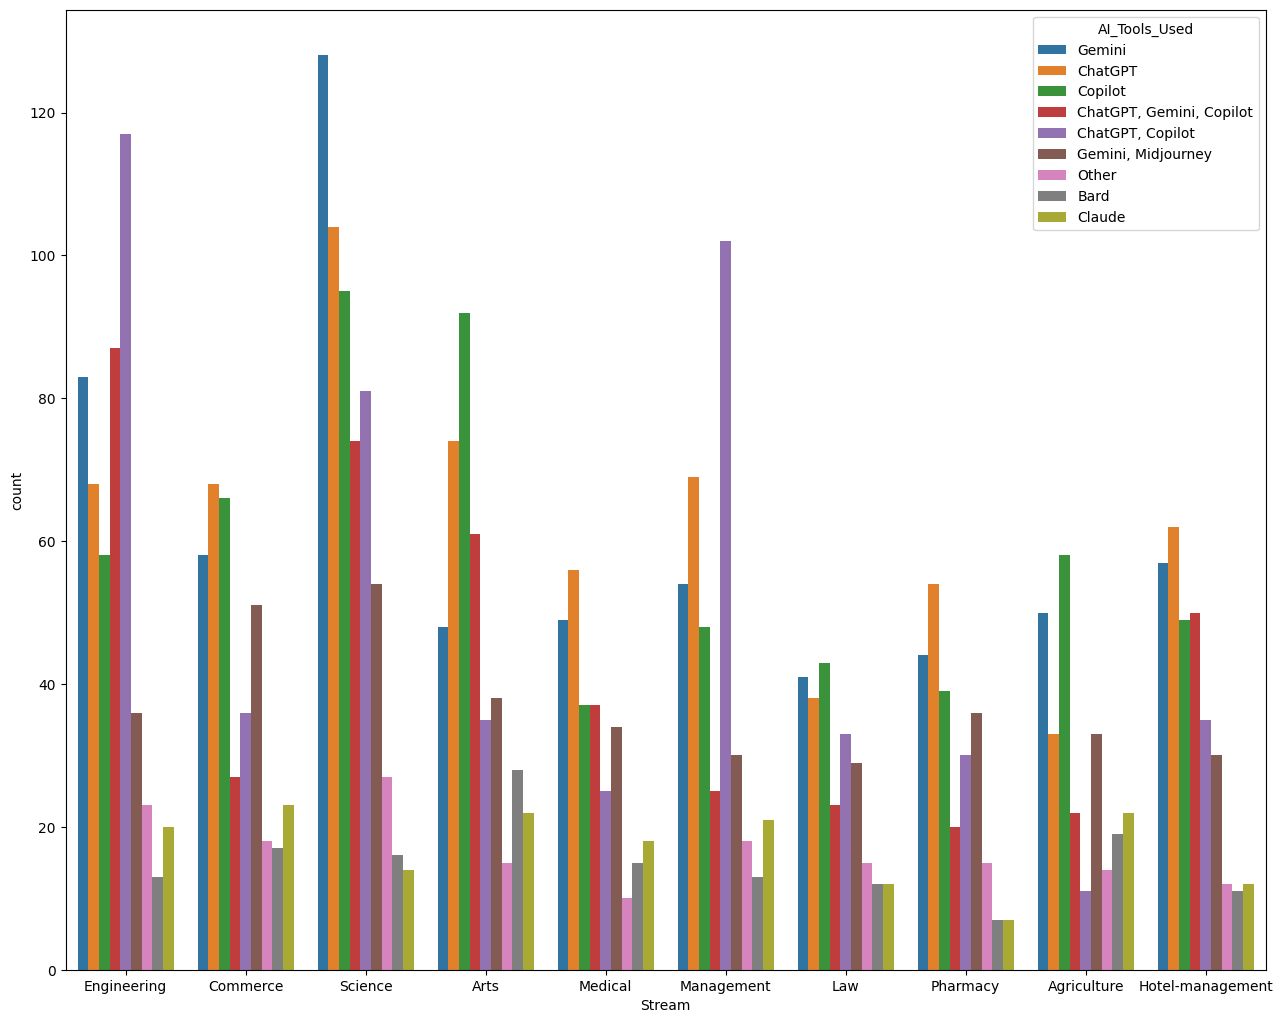

In [22]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

sns.countplot(x=df["Stream"],ax=ax,hue=df["AI_Tools_Used"])

There is no common preference among the students but taking consideration of highest student in dataset from engineering,science and arts,the choices are
(chatgpt,Copilot),Gemini and Copilot respectively we can say that somewhat copilot is preferred among these 3 stream 


<Axes: xlabel='Year_of_Study', ylabel='count'>

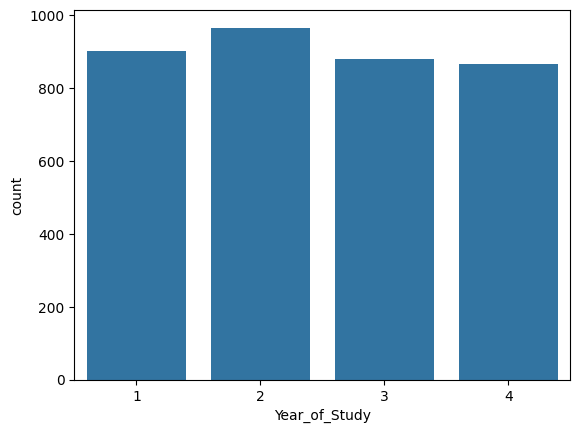

In [46]:
sns.countplot(x=df["Year_of_Study"])

<Axes: xlabel='Year_of_Study', ylabel='count'>

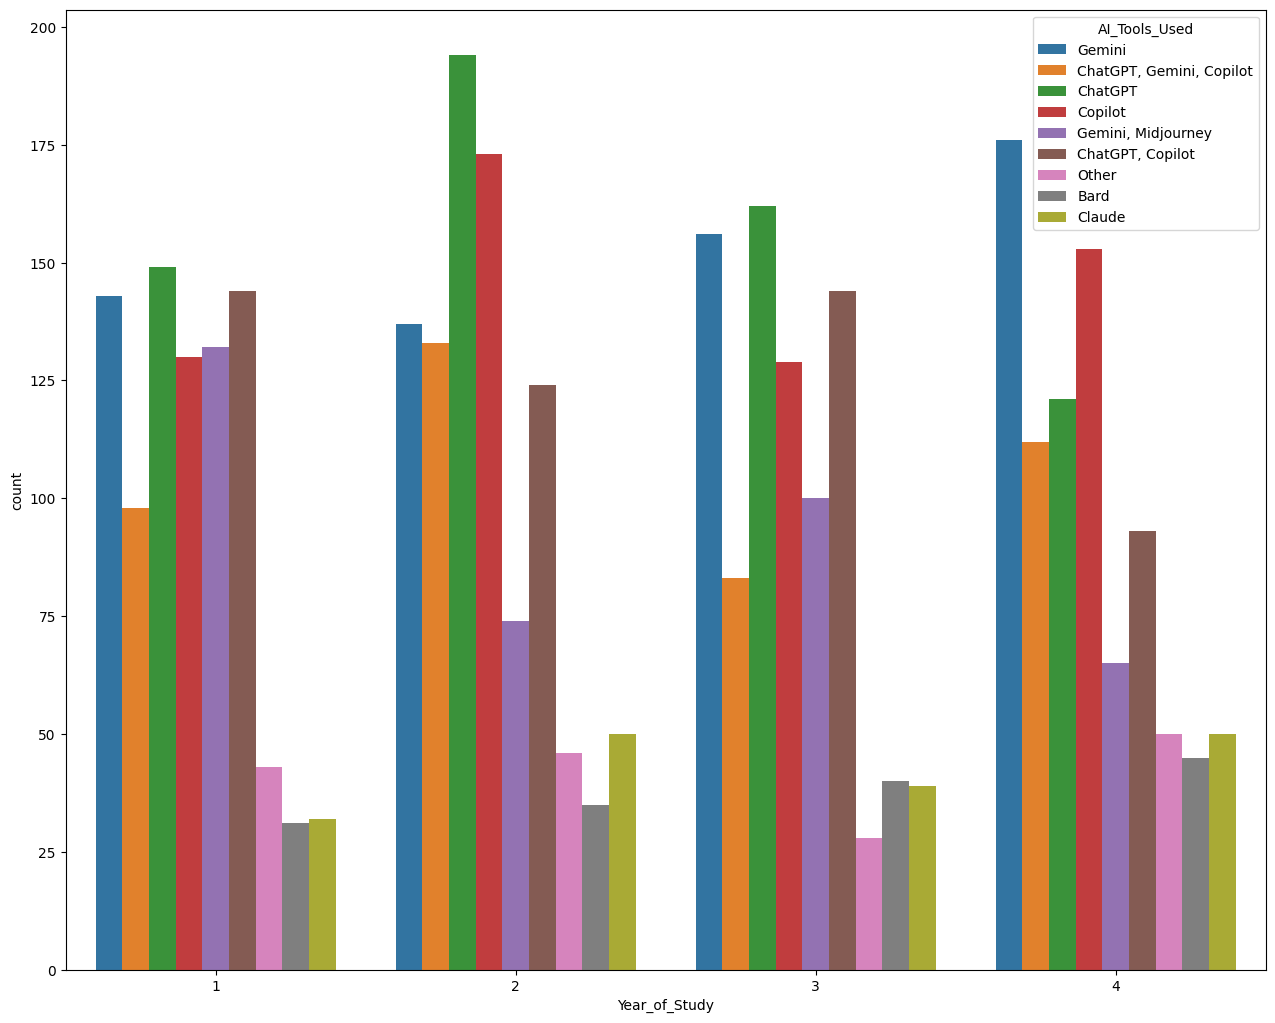

In [23]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
sns.countplot(x=df["Year_of_Study"],hue=df["AI_Tools_Used"],ax=ax)

OBSERVATIONS :
1) There is no clearcut choices amount 1 year student regarding ai tool
2) 2nd year students which happens to be the maximum category out of this have shown inclination towards Chatgpt
3) 3rd year students uses both chatgpt and gemini more than others
4) 4th year students are found to be more using gemini more than others ai tool .

## DAILY USAGE HOURS AND IMPACT ON GRADES

A boxplot to understand daily usage hours in perspective how much ai has impacted their grades

<Axes: xlabel='Impact_on_Grades', ylabel='Daily_Usage_Hours'>

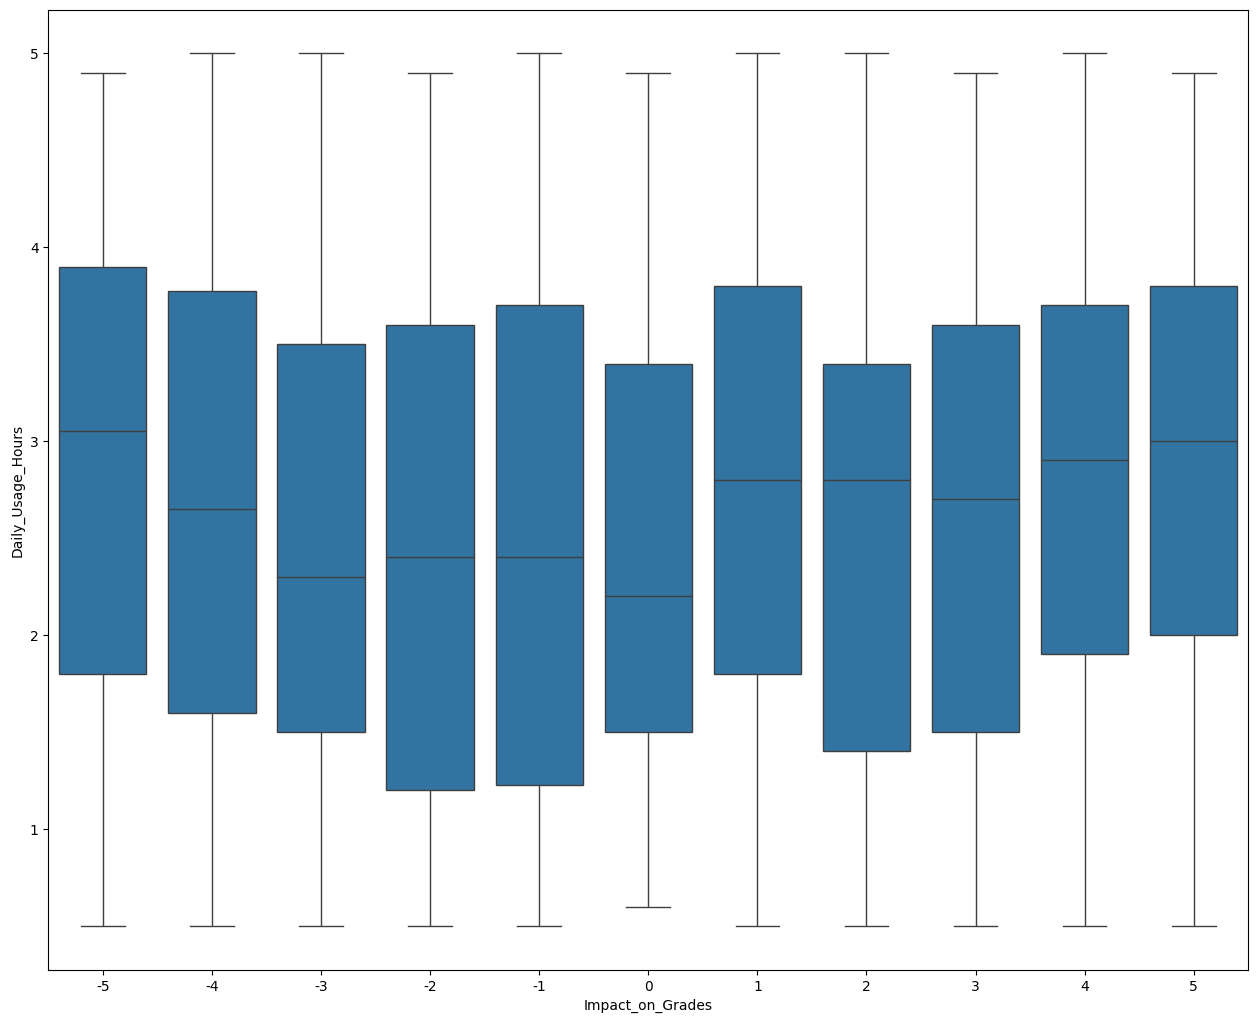

In [39]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
sns.boxplot(y=df["Daily_Usage_Hours"],x=df["Impact_on_Grades"],ax=ax)


## USE CASES ,PROFESSOR ALLOW AI , AWARENESS LEVEL

In [27]:
top_use_cases=df["Use_Cases"].value_counts().head(6).index
filtered_df = df[df["Use_Cases"].isin(top_use_cases)]
print(filtered_df.groupby("Use_Cases")["Impact_on_Grades"].mean())

Use_Cases
Assignments, Coding Help         0.202247
Content Writing                  0.182243
Doubt Solving, Resume Writing   -0.087404
Exam Prep, Notes                -0.066519
Learning new topics             -0.028846
MCQ Practice, Projects           0.017021
Name: Impact_on_Grades, dtype: float64


<Axes: xlabel='Use_Cases'>

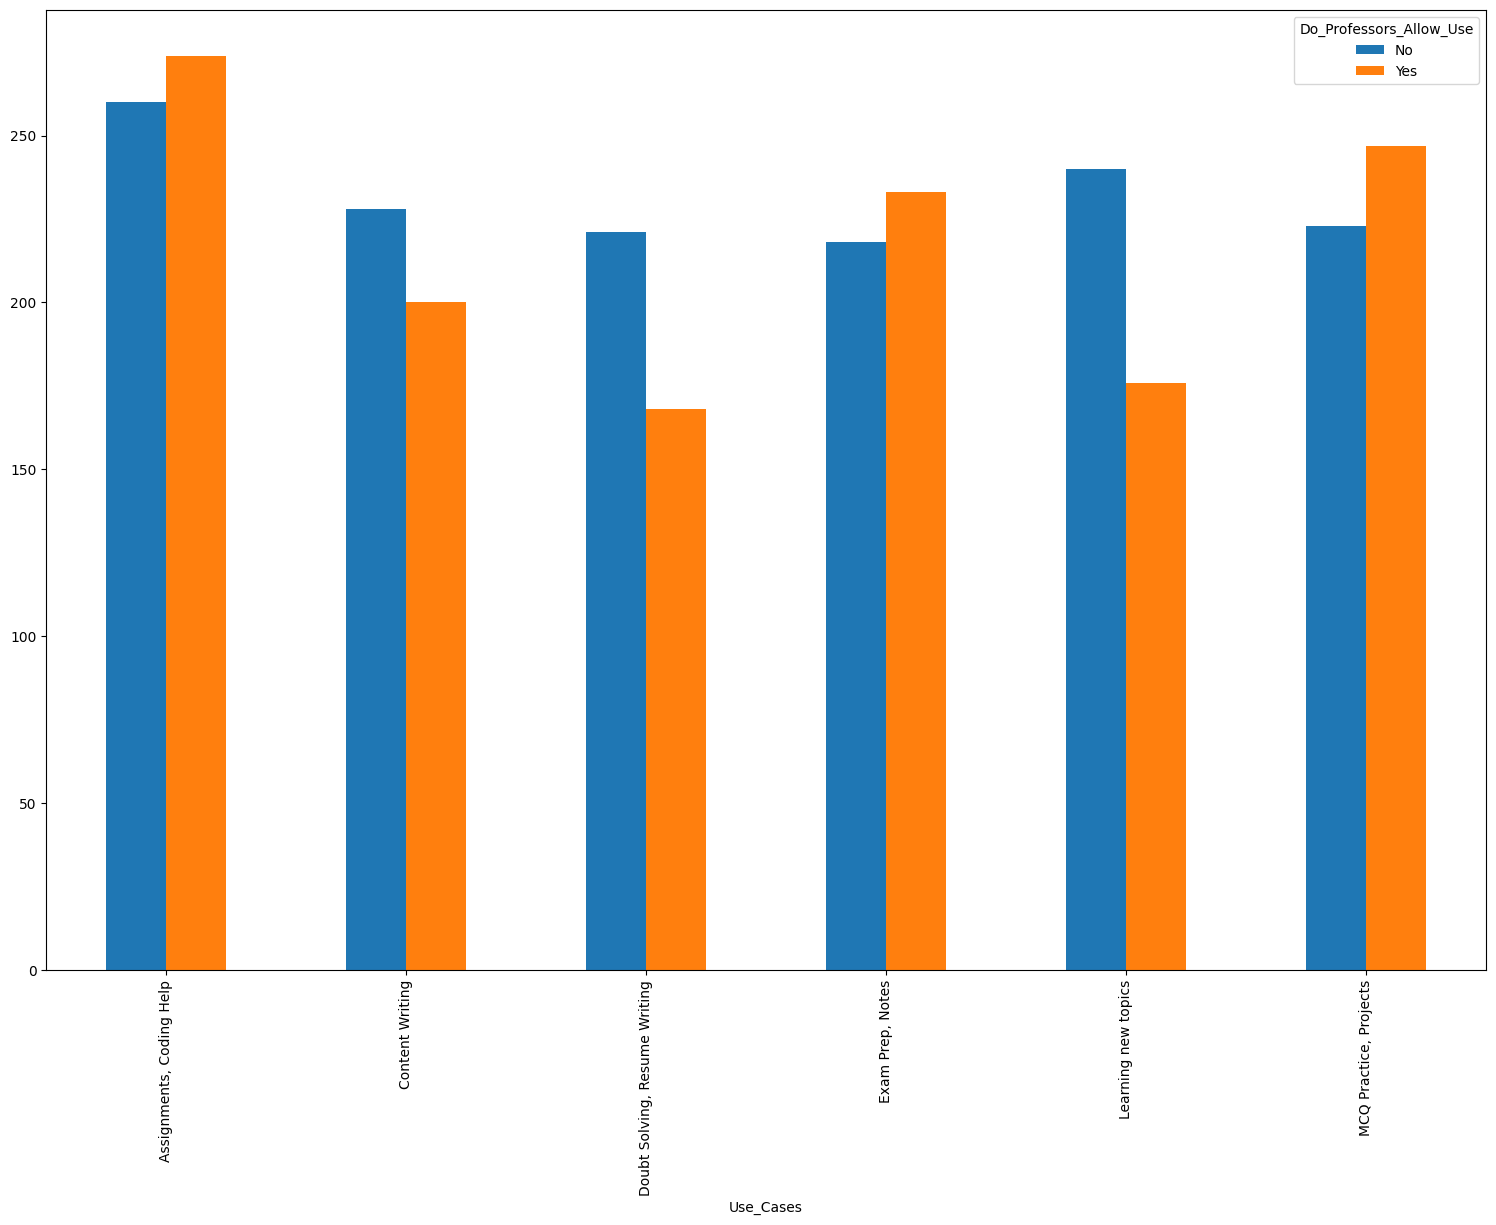

In [28]:
fig = plt.figure(figsize=[18,12])
ax = fig.add_axes([0.1,0.1,0.8,0.8])
(pd.crosstab(filtered_df["Use_Cases"],filtered_df["Do_Professors_Allow_Use"]).plot(kind="bar",ax=ax))

<Axes: xlabel='Impact_on_Grades', ylabel='Awareness_Level'>

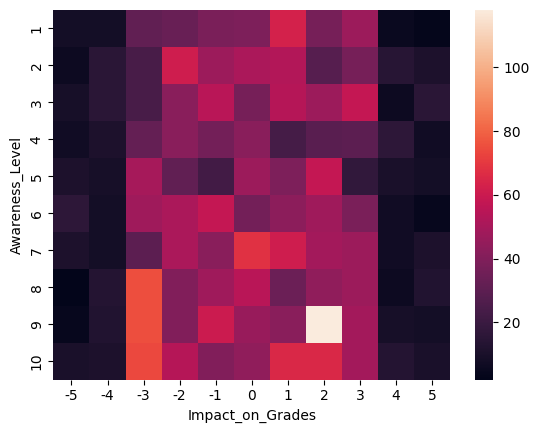

In [30]:
sns.heatmap(pd.crosstab(df["Awareness_Level"],df["Impact_on_Grades"]))

<Axes: xlabel='Preferred_AI_Tool', ylabel='Awareness_Level'>

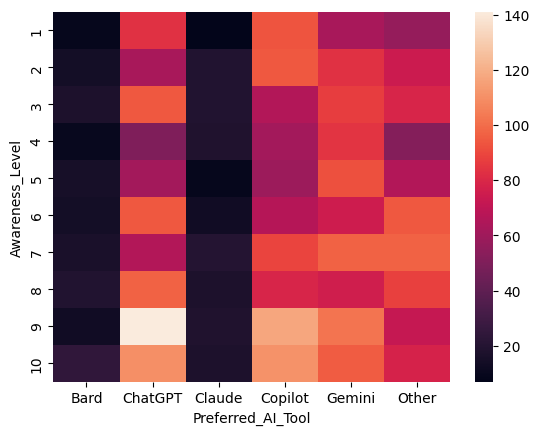

In [31]:
sns.heatmap(pd.crosstab(df["Awareness_Level"],df["Preferred_AI_Tool"]))

In [33]:
df["Willing_to_Pay_for_Access"]=df["Willing_to_Pay_for_Access"].apply(lambda x : 0 if x == "No" else 1)

In [34]:
df.head()

,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,Device_Used,Internet_Access
0,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,1,Mobile,Poor
1,Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,0,Laptop,Poor
2,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,0,Tablet,Poor
3,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,0,Laptop,High
4,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,1,Laptop,Medium


## ANALYSIS OF WILLINGNESS TO PAY BY STUDENTS ON THE BASIS OF DEVICE_USED INTERNET ACCESS

In [35]:
Pay_df=df[df["Willing_to_Pay_for_Access"]==1]

In [36]:
ct=pd.crosstab(index=[Pay_df["Willing_to_Pay_for_Access"],df["Preferred_AI_Tool"]],columns=[df["Device_Used"],df["Internet_Access"]])


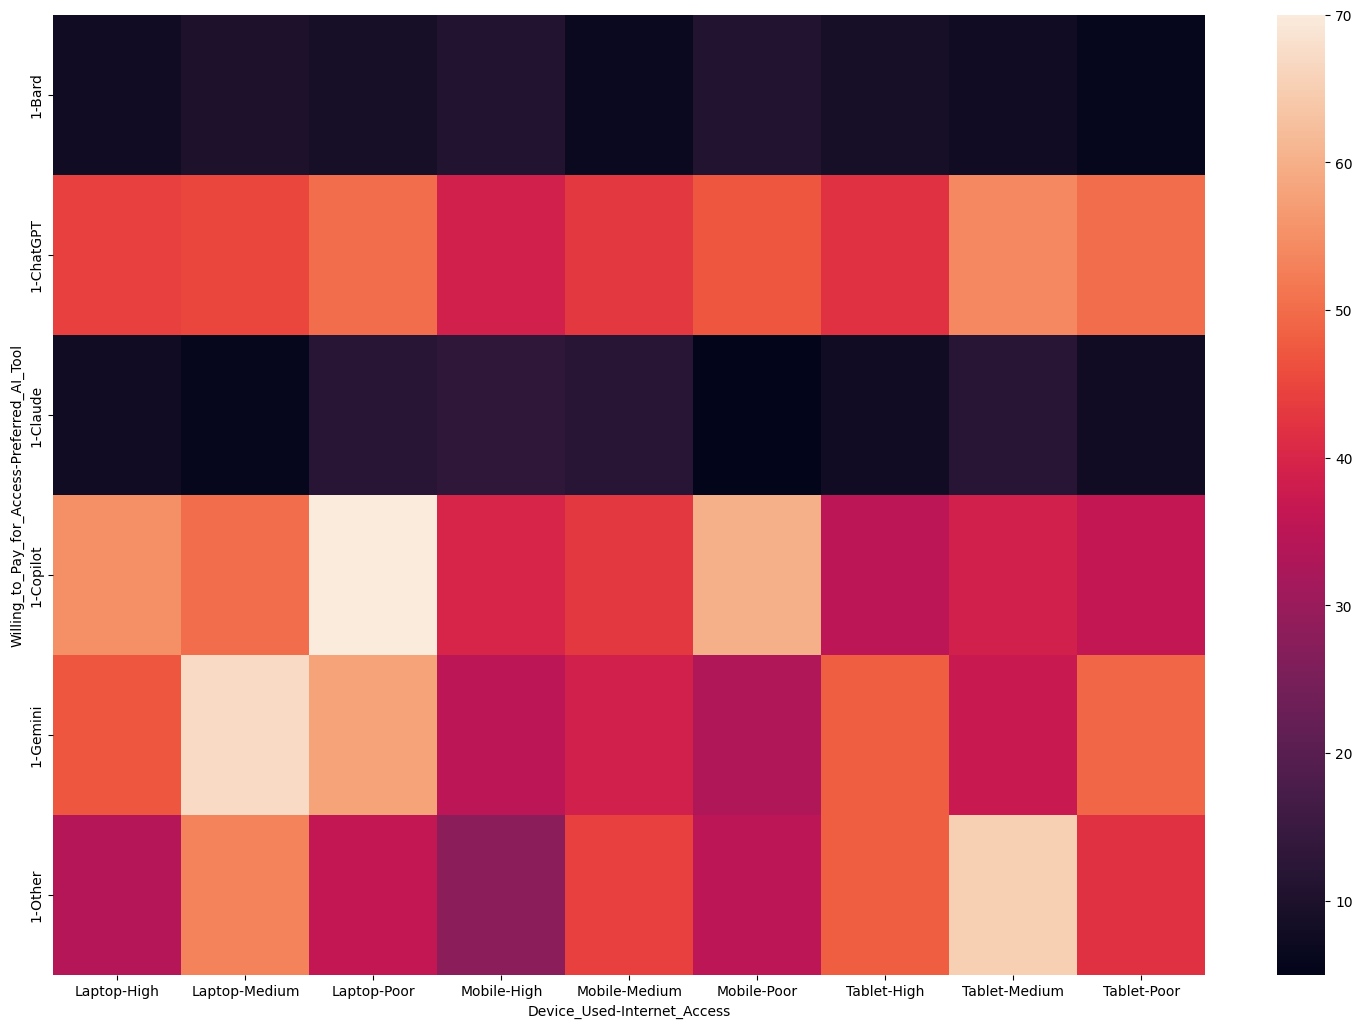

In [37]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
sns.heatmap(ct,ax=ax)
plt.savefig("DEVICE-INTERNET VS PAY TO ACCES",dpi=120)

OBSERVATION :
STUDENT WHO USE LAPTOP WITH POOR-MEDIUM ARE WILLING TO PAY FOR GEMINI AND COPILOT .
